<a href="https://colab.research.google.com/github/engmramadan86-dotcom/CoralWatch-Classification/blob/main/Build_Custom_Dataset_(Resnet50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
labels = pd.read_csv('/content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Data_set_csv_v1.csv')
labels.head()


,Name,Extension,Date accessed,Date modified,Date created,Folder Path,Class
0,Boulder Coral (1).JPG,.JPG,12/08/2025 22:03,12/08/2025 19:58,12/08/2025 22:03,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder Coral
1,Boulder Coral (10).JPG,.JPG,12/08/2025 22:03,12/08/2025 20:34,12/08/2025 22:03,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder Coral
2,Boulder Coral (100).jpg,.jpg,12/08/2025 22:03,03/08/2025 17:45,12/08/2025 22:00,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder Coral
3,Boulder Coral (101).jpg,.jpg,12/08/2025 22:03,03/08/2025 17:46,12/08/2025 22:00,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder Coral
4,Boulder Coral (102).jpg,.jpg,12/08/2025 22:03,03/08/2025 17:46,12/08/2025 22:00,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder Coral


In [4]:
data_path = '/content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional'
filename_column = 'Name'
label_column = 'Class'

# Create a dictionary for quick lookup of labels by filename
labels_dict = labels.set_index(filename_column)[label_column].to_dict()

dataset=[]

# Use os.walk to recursively search for images
for root, dirs, files in os.walk(data_path):
    for filename in files:
        # Convert filename to lowercase for case-insensitive extension check
        filename_lower = filename.lower()
        # Check if the filename is a supported image file (case-insensitive)
        if filename_lower.endswith(('.jpg', '.jpeg', '.png')):
            # Check if the original filename exists in our labels dictionary
            if filename in labels_dict:
                # Get the label from the dictionary
                label = labels_dict[filename]

                # Construct the full path to the image file
                image_full_path = os.path.join(root, filename)

                # We'll store the path and label for later use
                dataset.append({'image_path': image_full_path, 'label': label})
            else:
                print(f"Warning: No label found for image '{filename}'. Skipping.")

# Print some details about your newly created dataset
print(f"\nSuccessfully created a dataset with {len(dataset)} items.")
if dataset:
    print("First item in the dataset:")
    print(dataset[0])


Successfully created a dataset with 678 items.
First item in the dataset:
{'image_path': '/content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (156).jpg', 'label': 'Boulder Coral '}


In [5]:
# Print the total number of items to confirm the size
print(f"Dataset has {len(dataset)} items.")

# Print the first 5 items to inspect the structure
print("\n--- First 5 data points ---")
for i in range(5):
    if i < len(dataset):
        print(f"Item {i+1}:")
        print(f"  Path: {dataset[i]['image_path']}")
        print(f"  Label: {dataset[i]['label']}")
        print("---")

Dataset has 678 items.

--- First 5 data points ---
Item 1:
  Path: /content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (156).jpg
  Label: Boulder Coral 
---
Item 2:
  Path: /content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (157).jpg
  Label: Boulder Coral 
---
Item 3:
  Path: /content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (155).jpg
  Label: Boulder Coral 
---
Item 4:
  Path: /content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (160).jpg
  Label: Boulder Coral 
---
Item 5:
  Path: /content/drive/MyDrive/M.SC Graduation Project/01-Final Data set - Additional/Boulder Coral/Boulder Coral (159).jpg
  Label: Boulder Coral 
---


In [6]:
label_counts = labels['Class'].value_counts()
print("Number of items for each category:")
print(label_counts)

Number of items for each category:
Class
Branched Coral     224
Boulder Coral      174
Soft Coral         160
Plate Coral        120
Name: count, dtype: int64


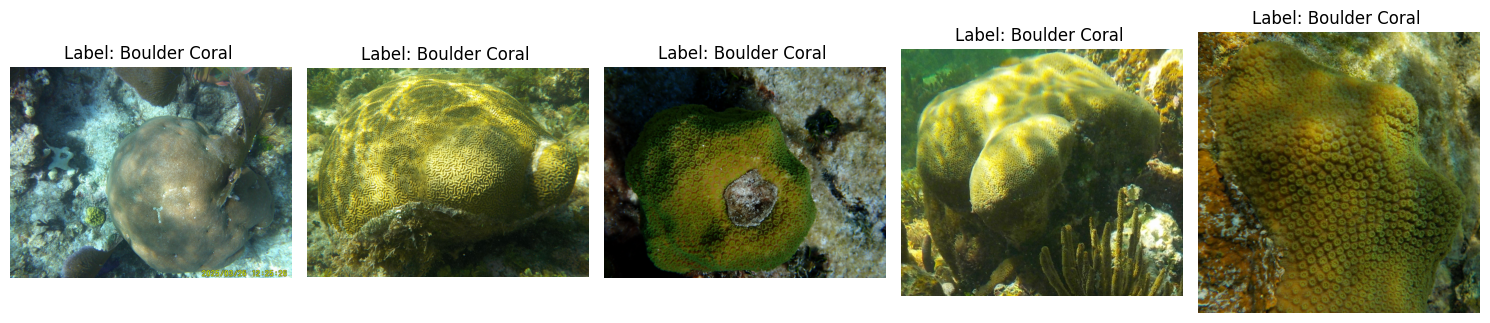

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'dataset' is the list of dictionaries you created

# We will preview the first 5 images in the dataset
num_images_to_preview = 5

# Set up a figure to display the images
plt.figure(figsize=(15, 5)) # Adjust the figure size as needed

# Loop through the first few items in the dataset
for i in range(num_images_to_preview):
    if i < len(dataset):
        # Get the image path and label from your dataset list
        image_path = dataset[i]['image_path']
        label = dataset[i]['label']

        # Open the image file
        try:
            image = Image.open(image_path)

            # Display the image and its label
            plt.subplot(1, num_images_to_preview, i + 1)
            plt.imshow(image)
            plt.title(f"Label: {label}")
            plt.axis('off') # Hide the axes for a cleaner look

        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}. Skipping.")
        except Exception as e:
            print(f"An error occurred while opening {image_path}: {e}. Skipping.")

plt.tight_layout() # Adjust subplots to fit in the figure
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Extract labels from the dataset for stratification
labels = [item['label'] for item in dataset]

# Split the dataset into training and testing sets with stratification
train_data, test_data = train_test_split(
    dataset,
    test_size=0.2,
    random_state=42,  # for reproducibility
    stratify=labels   # stratify based on labels
)

print(f"Training dataset size: {len(train_data)}")
print(f"Testing dataset size: {len(test_data)}")

Training dataset size: 542
Testing dataset size: 136


In [9]:
from collections import Counter

# Extract labels from the original dataset
all_labels = [item['label'] for item in dataset]

# Extract labels from the training set
y_train = [item['label'] for item in train_data]

# Extract labels from the testing set
y_test = [item['label'] for item in test_data]

# Count labels in the original dataset
print("Original Dataset Label Counts:", Counter(all_labels))

# Count labels in the training set
print("Training Set Label Counts:", Counter(y_train))

# Count labels in the testing set
print("Testing Set Label Counts:", Counter(y_test))

Original Dataset Label Counts: Counter({'Branched Coral ': 224, 'Boulder Coral ': 174, 'Soft Coral ': 160, 'Plate Coral ': 120})
Training Set Label Counts: Counter({'Branched Coral ': 179, 'Boulder Coral ': 139, 'Soft Coral ': 128, 'Plate Coral ': 96})
Testing Set Label Counts: Counter({'Branched Coral ': 45, 'Boulder Coral ': 35, 'Soft Coral ': 32, 'Plate Coral ': 24})


In [10]:
import torchvision.models as models

# List available pre-trained models
print("Available pre-trained models in torchvision.models:")
print([model for model in models.__dict__ if callable(models.__dict__[model]) and not model.startswith('_')])

Available pre-trained models in torchvision.models:
['alexnet', 'AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Tiny_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'convnext_tiny', 'convnext_small', 'convnext_base', 'convnext_large', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_S_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_L_Weights', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_s', 'efficientnet_v2_m', 'efficientnet_v2_l', 'googlenet', 'GoogLeNet'

In [11]:
import torch
import torchvision.models as models

# Load the pre-trained ResNet50 model
# We set weights to the latest ImageNet weights
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

print("Pre-trained ResNet50 model loaded successfully.")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


Pre-trained ResNet50 model loaded successfully.


In [12]:
import torch.nn as nn

# Get the number of input features for the last fully connected layer
num_ftrs = resnet50.fc.in_features

# Replace the last fully connected layer with a new one
# The number of output features should be equal to the number of classes in your dataset
num_classes = 4 # Based on the label counts (Branched, Plate, Boulder, Soft)
resnet50.fc = nn.Linear(num_ftrs, num_classes)

print(f"ResNet50 classifier modified to have {num_classes} output classes.")

ResNet50 classifier modified to have 4 output classes.


In [13]:
import torch.optim as optim
import torch.nn as nn

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.001) # You can adjust the learning rate

print("Loss function and optimizer defined.")

Loss function and optimizer defined.


In [14]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# 1. Define the transformations and augmentations
# These transformations are common for pre-trained models like ResNet
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(), # Data Augmentation
        transforms.RandomRotation(15),     # Data Augmentation
        transforms.ToTensor(),             # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

# 2. Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform
        # Create a mapping from label name to integer index
        # Assuming the labels are consistent across splits
        all_labels = sorted(list(set([item['label'] for item in data_list])))
        self.label_map = {label: i for i, label in enumerate(all_labels)}


    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        # Get the path and label from the list
        image_path = self.data_list[idx]['image_path']
        label_name = self.data_list[idx]['label']

        # Get the integer label using the label map
        label = self.label_map[label_name]

        # Load the image
        image = Image.open(image_path).convert('RGB')

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Return the processed image and integer label
        return image, label

# 3. Instantiate the dataset and dataloader
train_dataset = CustomDataset(train_data, transform=data_transforms['train'])
val_dataset = CustomDataset(test_data, transform=data_transforms['val']) # Using test_data as validation for now

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Data loaders for training and validation created.")

Data loaders for training and validation created.


In [15]:
import torch
import time
import copy

# Check if GPU is available and move the model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)

# Number of training epochs
num_epochs = 10 # You can adjust this

# Track best model
best_model_wts = copy.deepcopy(resnet50.state_dict())
best_acc = 0.0

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            resnet50.train()  # Set model to training mode
            dataloader = train_loader
        else:
            resnet50.eval()   # Set model to evaluate mode
            dataloader = val_loader

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            with torch.set_grad_enabled(phase == 'train'):
                outputs = resnet50(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # deep copy the model if it's the best accuracy
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(resnet50.state_dict())

    print()

print('Training complete.')
print(f'Best validation Acc: {best_acc:.4f}')

# load best model weights
resnet50.load_state_dict(best_model_wts)

Epoch 0/9
----------
train Loss: 0.7400 Acc: 0.7325
val Loss: 3.8685 Acc: 0.7721

Epoch 1/9
----------
train Loss: 0.5663 Acc: 0.8284
val Loss: 1.5730 Acc: 0.7059

Epoch 2/9
----------
train Loss: 0.4508 Acc: 0.8727
val Loss: 1.4991 Acc: 0.7059

Epoch 3/9
----------
train Loss: 0.3499 Acc: 0.8801
val Loss: 0.8040 Acc: 0.6985

Epoch 4/9
----------
train Loss: 0.3728 Acc: 0.8727
val Loss: 0.6374 Acc: 0.8235

Epoch 5/9
----------
train Loss: 0.3713 Acc: 0.8911
val Loss: 0.8355 Acc: 0.8015

Epoch 6/9
----------
train Loss: 0.2864 Acc: 0.9004
val Loss: 0.4659 Acc: 0.8162

Epoch 7/9
----------
train Loss: 0.2532 Acc: 0.9151
val Loss: 0.5593 Acc: 0.8529

Epoch 8/9
----------
train Loss: 0.2614 Acc: 0.9280
val Loss: 0.9338 Acc: 0.7868

Epoch 9/9
----------
train Loss: 0.1918 Acc: 0.9465
val Loss: 0.4240 Acc: 0.8529

Training complete.
Best validation Acc: 0.8529


<All keys matched successfully>

In [16]:
# Save the best model weights
model_save_path = '/content/drive/MyDrive/M.SC Graduation Project/best_model_weights.pth' # You can change the path
torch.save(best_model_wts, model_save_path)
print(f"Best model weights saved to {model_save_path}")

Best model weights saved to /content/drive/MyDrive/M.SC Graduation Project/best_model_weights.pth


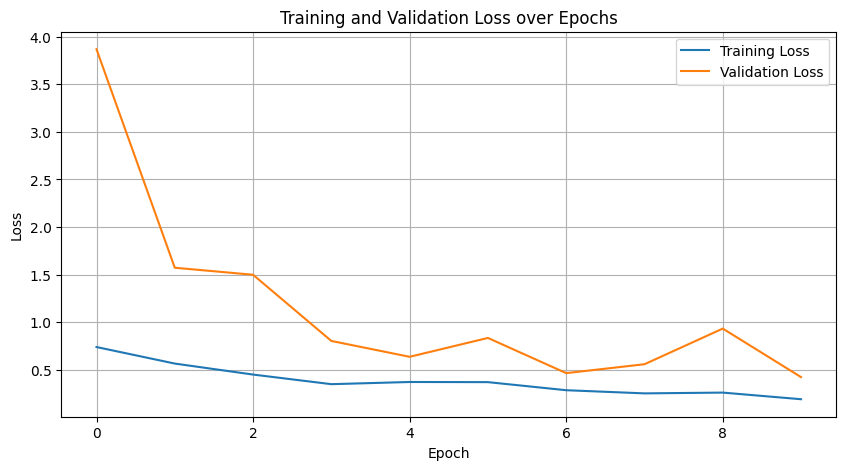

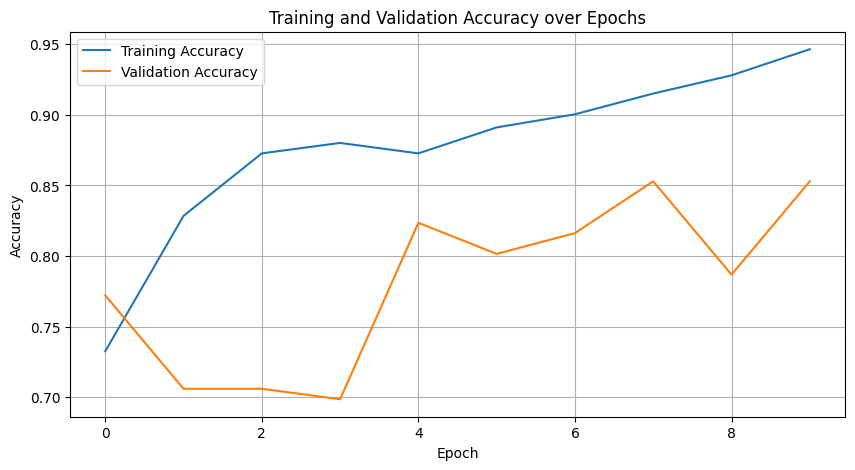

In [17]:
import matplotlib.pyplot as plt

# Assuming you have lists to store training and validation loss and accuracy
# For example:
# train_loss_history = [...]
# train_acc_history = [...]
# val_loss_history = [...]
# val_acc_history = [...]

# Placeholder data - replace with your actual training history lists
# You would typically collect these within your training loop
# For this example, let's extract from the printed output (less ideal, but demonstrates)
# In a real scenario, modify the training loop to store these values.

# --- Start: Extracting data from the previous output (replace with actual history lists) ---
# This is a manual step based on the previous output, a better approach is to store
# the loss and accuracy values in lists within the training loop.

train_loss_history = [0.7400, 0.5663, 0.4508, 0.3499, 0.3728, 0.3713, 0.2864, 0.2532, 0.2614, 0.1918]
train_acc_history = [0.7325, 0.8284, 0.8727, 0.8801, 0.8727, 0.8911, 0.9004, 0.9151, 0.9280, 0.9465]
val_loss_history = [3.8685, 1.5730, 1.4991, 0.8040, 0.6374, 0.8355, 0.4659, 0.5593, 0.9338, 0.4240]
val_acc_history = [0.7721, 0.7059, 0.7059, 0.6985, 0.8235, 0.8015, 0.8162, 0.8529, 0.7868, 0.8529]

# --- End: Extracting data ---


# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_loss_history)), train_loss_history, label='Training Loss')
plt.plot(range(len(val_loss_history)), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_acc_history)), train_acc_history, label='Training Accuracy')
plt.plot(range(len(val_acc_history)), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
                 precision    recall  f1-score   support

 Boulder Coral        0.68      0.91      0.78        35
Branched Coral        0.93      0.93      0.93        45
   Plate Coral        1.00      0.79      0.88        24
    Soft Coral        0.92      0.72      0.81        32

       accuracy                           0.85       136
      macro avg       0.88      0.84      0.85       136
   weighted avg       0.88      0.85      0.86       136


Confusion Matrix:
[[32  1  0  2]
 [ 3 42  0  0]
 [ 5  0 19  0]
 [ 7  2  0 23]]


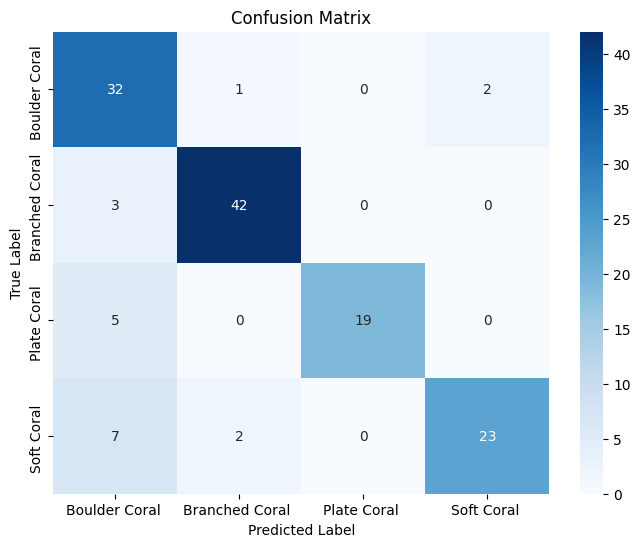

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import torch

# Ensure the model is in evaluation mode and on the correct device
resnet50.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)

# Store predictions and true labels
all_preds = []
all_labels = []

# Disable gradient calculations for evaluation
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet50(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Get the class names from the dataset's label map
# Assuming val_dataset has the label_map attribute
class_names = list(val_dataset.label_map.keys())

# Generate classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Generate confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

# Optional: Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()